In [1]:
import pandas as pd

import tqdm

In [2]:
import glob 

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import matplotlib.colors as colors

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
import numpy as np

In [7]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [8]:
matplotlib.rc('font', **font)

**Clean data**

In [9]:
in_columns = ["y", "p", "q", "average cooperation rate", "average score", "t"]

In [10]:
csv_files = glob.glob('matlab/data/expected/c_1_*csv')

In [11]:
# for file in tqdm.tqdm_notebook(csv_files):    
#     df = pd.read_csv(file, header=None)
#     df = df.drop_duplicates()
#     df.columns = in_columns
    
#     frequencies = []
#     previous = 0
#     for value in df['t'][1:]:
#         frequencies.append(value - previous)
#         previous = value
#     frequencies.append(10 ** 7 - previous)
    
#     df['frequencies'] = frequencies
    
#     df.to_csv(f"matlab/data/expected/clean_{file[21:]}", index=False)

**Clean based on $b$**

In [12]:
bs = range(1, 11)

In [13]:
csv_files = [f'../matlab/data/expected/clean_c_1_b_{b}_stochastic_0.csv' for b in bs]
csv_files_stoch = [f'../matlab/data/stochastic/clean_c_1_b_{b}_stochastic_1.csv' for b in bs]

In [15]:
points_p = []
points_q = []

for file in csv_files:
    df = pd.read_csv(file)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

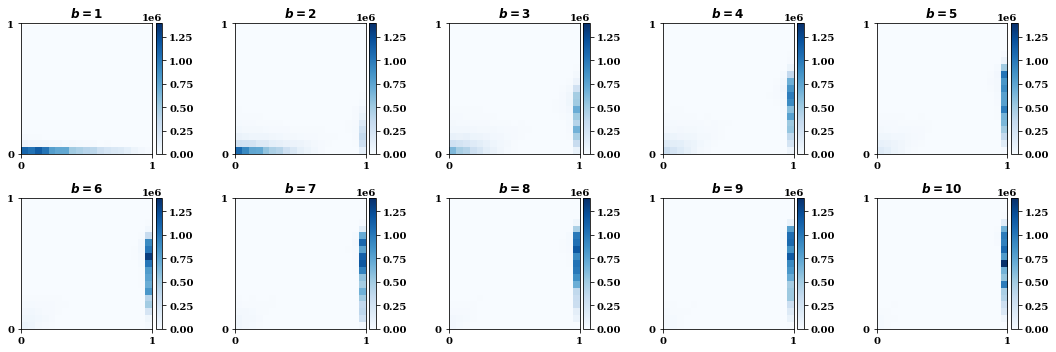

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

for i, points in enumerate(zip(points_p, points_q)):
    index = (int(i / 5), i % 5)

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=matplotlib.cm.get_cmap("Blues"), vmin=0,
                            vmax=1391629.0)
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[index].set_title(f"$b={bs[i]}$", weight="bold");
    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

plt.tight_layout();



plt.savefig("../matlab/images/expected_for_beta.pdf", bbox_inches='tight')

In [66]:
points_p = []
points_q = []

for file in csv_files_stoch:
    df = pd.read_csv(file)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

In [97]:
heatmap, xedges, yedges = np.histogram2d(points_p[0], points_q[0], bins=25,)

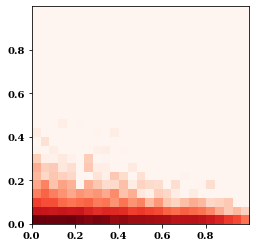

In [101]:
plt.imshow(np.where(heatmap==0,1,heatmap).T, 
                        extent=extent,
                        origin="lower", 
                        cmap=matplotlib.cm.get_cmap("Reds"),
                         norm=colors.LogNorm(vmin=100,
                                             vmax=heatmap.max()));

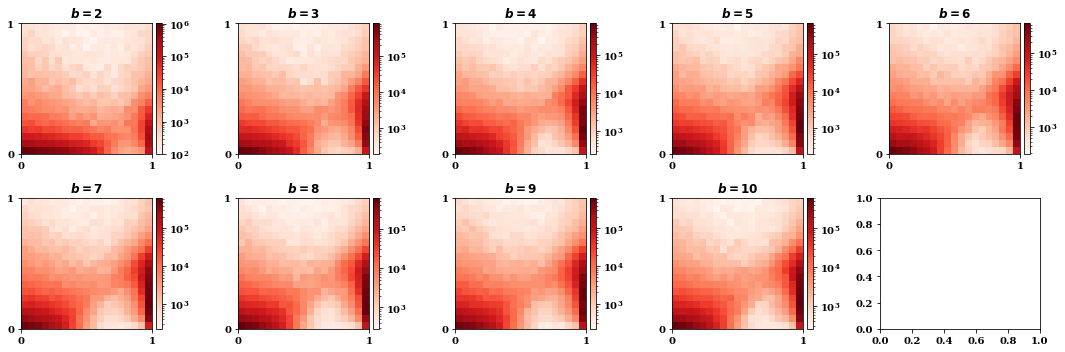

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

for i, points in enumerate(zip(points_p[1:], points_q[1:])):
    index = (int(i / 5), i % 5)

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=19,)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, 
                            extent=extent,
                            origin="lower", 
                            cmap=matplotlib.cm.get_cmap("Reds"),
                             norm=colors.LogNorm(vmin=heatmap.min(),
                                                 vmax=heatmap.max()))
#                             vmin=0,
#                             vmax=1089309.0)
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[index].set_title(f"$b={bs[i + 1]}$", weight="bold");
    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

plt.tight_layout();

# plt.savefig("../matlab/images/stochastic_for_beta.pdf", bbox_inches='tight')

In [103]:
cooperation_rates = []
cooperation_rates_expected = []

In [106]:
for file in csv_files:
    df = pd.read_csv(file)
    cooperation_rates_expected.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

In [107]:
for file in csv_files_stoch:
    df = pd.read_csv(file)
    cooperation_rates.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

In [108]:
reds = matplotlib.cm.get_cmap("Reds")
blues = matplotlib.cm.get_cmap("Blues")

In [109]:
reds(1)

(0.9998769703960015, 0.9582006920415225, 0.9374855824682814, 1.0)

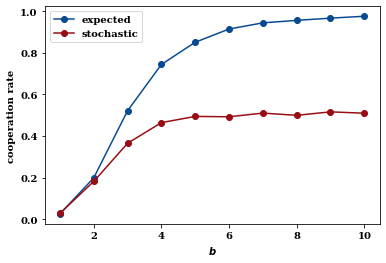

In [110]:
fig, axes = plt.subplots()

axes.plot(range(1, 11), cooperation_rates_expected, "-o", color=blues(0.9), label="expected");
axes.plot(range(1, 11), cooperation_rates, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('cooperation rate', weight="bold");
axes.set_xlabel('$b$', weight="bold");

plt.legend()
plt.savefig("static/cooperation_rate_over_b.pdf", bbox_inches='tight')

**Clean based on $\beta$**

In [52]:
betas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [55]:
csv_files = [f'../matlab/data/expected/clean_beta_{beta}_stochastic_0.csv' for beta in betas]

In [56]:
points_p = []
points_q = []

for file in csv_files:
    df = pd.read_csv(file)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

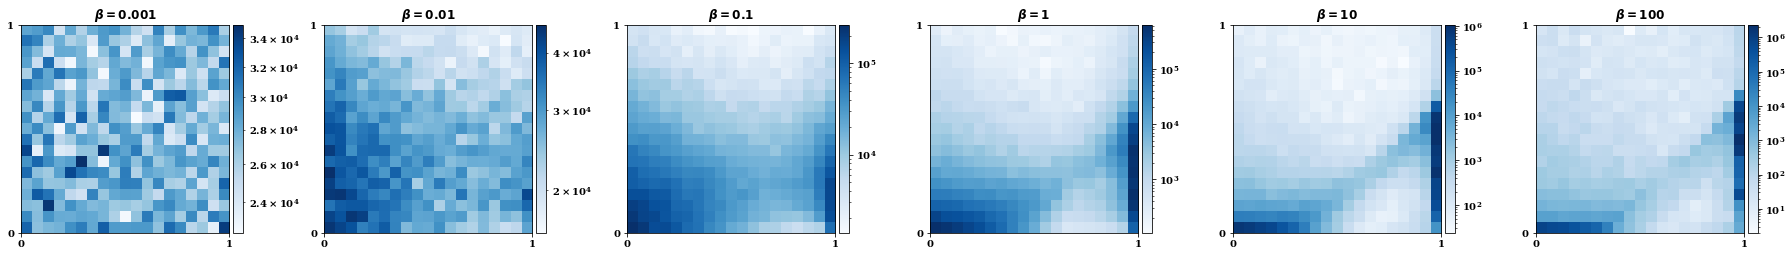

In [65]:
fig, axes = plt.subplots(ncols=6, figsize=(25, 5))

for i, points in enumerate(zip(points_p[1:], points_q[1:])):

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=19,)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[i].imshow(heatmap.T, extent=extent, origin="lower",
                        cmap=matplotlib.cm.get_cmap("Blues"),  norm=colors.LogNorm(vmin=heatmap.min(),
                                                                                    vmax=heatmap.max()))
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[i].set_title(fr"$\beta={betas[i+1]}$", weight="bold");
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2))
plt.tight_layout()

In [62]:
csv_files_stoch = [f'matlab/data/stochastic/clean_beta_{b}_stochastic_1.csv' for b in betas]

In [63]:
points_p = []
points_q = []

for file in csv_files_stoch:
    df = pd.read_csv(file)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

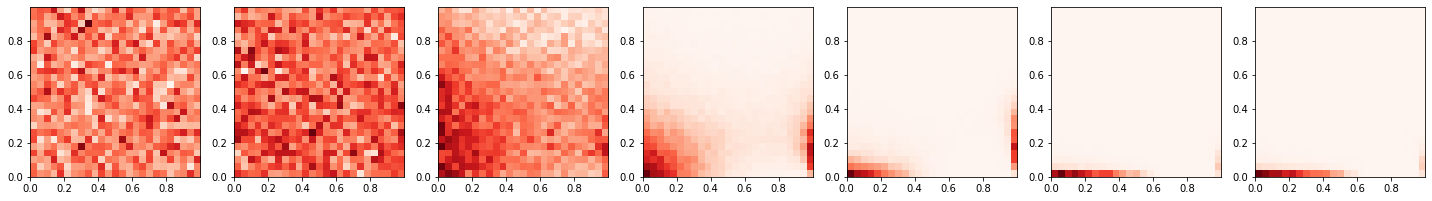

In [114]:
fig, axes = plt.subplots(ncols=7, figsize=(25, 5))

for i, points in enumerate(zip(points_p, points_q)):

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=25,)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[i].imshow(heatmap.T, extent=extent, origin="lower", cmap=matplotlib.cm.get_cmap("Reds"))

In [75]:
cooperation_rates = []
cooperation_rates_expected = []

In [76]:
for file in csv_files:
    df = pd.read_csv(file)
    cooperation_rates_expected.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

In [77]:
for file in csv_files_stoch:
    df = pd.read_csv(file)
    cooperation_rates.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

/Users/glynatsi/opt/anaconda3/envs/stochastic-payoffs/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


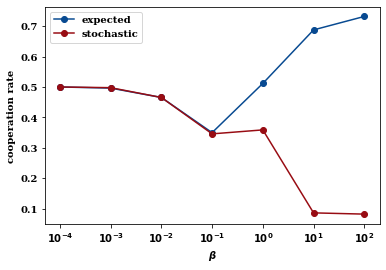

In [94]:
fig, axes = plt.subplots()

axes.plot(range(1, 8), cooperation_rates_expected, "-o", color=blues(0.9), label="expected");
axes.plot(range(1, 8), cooperation_rates, "-o", color=reds(0.9), label="stochastic");

axes.set_ylabel('cooperation rate', weight="bold");
axes.set_xlabel(r'$\beta$', weight="bold");

axes.set_xticklabels([0, r"$10^{-4}$",
                      r"$10^{-3}$",
                      r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

plt.legend()
plt.savefig("static/cooperation_rate_over_betas.pdf", bbox_inches='tight')

[0,
 '$10^{-4}$',
 '$10^{-3}$',
 '$10^{-2}$',
 '$10^{-1}$',
 '$10^{0}$',
 '$10^{1}$',
 '$10^{2}$']

In [86]:
betas

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
fig, axes = plt.subplots()

axes.plot(range(1, 11), cooperation_rates_expected, "-o", color=blues(0.9));
axes.plot(range(1, 11), cooperation_rates, "-o", color=reds(.9));

axes.set_ylabel('cooperation rate', weight="bold");
axes.set_xlabel('$b$', weight="bold");